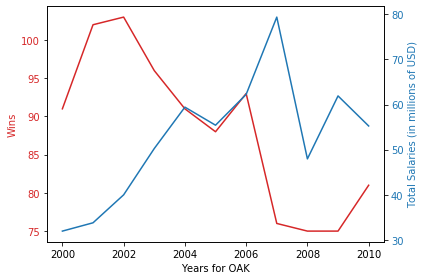

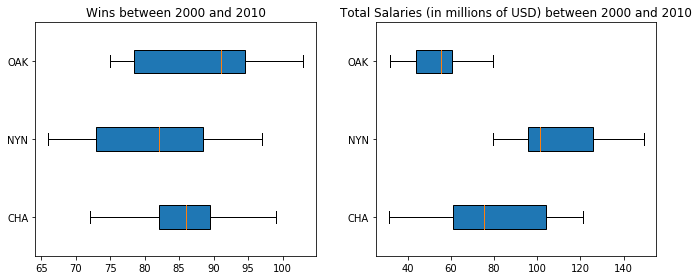

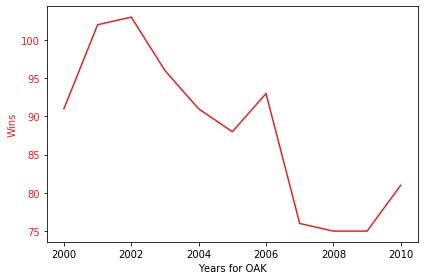

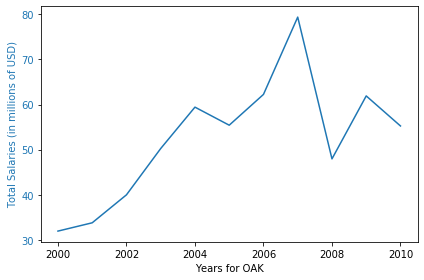

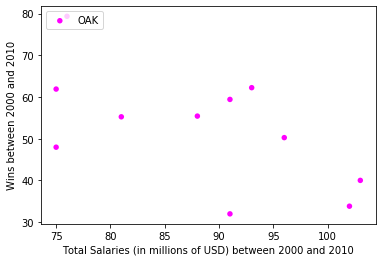

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from get_csv_files import get_zipped_csv_files
import wins_and_salaries_graph as wsg
import pandas

# Problem 1(a)
csv_files = ['Salaries.csv', 'Teams.csv']

get_zipped_csv_files(csv_files=csv_files)

salary_data = pandas.read_csv('Salaries.csv') 
teams_data = pandas.read_csv('Teams.csv')

salary_data.head()
teams_data.head()

# Problem 1(b)
salary_totals = salary_data.groupby(['yearID', 'teamID'])['salary'].sum()
salary_totals.head()

# Problem 1(c)
wins_and_salaries = pandas.merge(salary_totals, teams_data[['yearID', 'teamID', 'W']], on=['yearID', 'teamID'], how='inner')
wins_and_salaries.head()

#  Problem 1(d).  To display the relationship between total wins and total salaries for a given year,
#  I would use two different axes that share the same x axis.  Since wins and salaries share the year range (x-axis),
#  I can plot the second series (total salaries) against the secondary Y axis on the right side of the graph.

START_YEAR = 2000
END_YEAR = 2010
TEAMS = ['CHA', 'NYN', 'OAK']

wsg.graph_dual_y(wins_and_salaries, 'OAK', START_YEAR, END_YEAR)

wsg.graph_boxplots(wins_and_salaries, TEAMS, START_YEAR, END_YEAR)

wsg.graph_xy_line(wins_and_salaries, 'OAK', 'wins', START_YEAR, END_YEAR)
wsg.graph_xy_line(wins_and_salaries, 'OAK', 'SALARIES', START_YEAR, END_YEAR)

#  As seen in the xy scatter chart of total salaries vs wins, over 2000 to 2010, when the total salaries
#  for the Oakland A's were at their highest, the wins were at their lowest.  The highest total wins occurred in 2002,
#  yet their total salaries were not at their highest. Also, as total salaries rose, their wins decreased between 2002
#  and 2005.  Could this mean, that if the total salaries 
wsg.xy_scatter_3_teams(wins_and_salaries, ['OAK'], START_YEAR, END_YEAR)